<a href="https://colab.research.google.com/github/DolgorTs/resumeandprojects.github/blob/main/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9_%D0%B8_%D0%BF%D1%80%D0%BE%D0%BF%D1%83%D1%89%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9_(%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82_%D0%BE_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BD%D0%B8%D0%BA%D0%B0%D1%85)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках данной работы был исследован датасет, содержащий информацию о работниках (имя, фамилия, возраст, эл почта, зарплата, дата трудоустройства).

В ходя исследования было выполнено:
1. Загрзка файла
2. Преобразование типов данных
3. Найдены и проработаны аномальные, пропущенные значения и дубликаты

Применены инструменты:
1. Регулярные выражения
2. Функции
3. Визуализации

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('df.csv')

In [ ]:
df

,first_name,last_name,age,email,salary,join_date
0,Quincy,White,33,beatrice@example.com,64642,2022-08-07 00:00:00
1,Xena,Rodriguez,28,quincy@example.com,96273,2021-09-03 00:00:00
2,Leo,Smith,56,charlie@example.com,117527,2023-07-07 00:00:00
3,Jack,Allen,33,vera@example.com,54033,2021-12-02 00:00:00
4,Charlie,Taylor,38,quinn@example.com,30837,2023-12-05 00:00:00
...,...,...,...,...,...,...
995,Hannah,Hall,46,henry@example.com,50541,2023-06-30 00:00:00
996,Tara,Mitchell,43,grace@example.com,119998,2022-13-01
997,Isaac,Wilson,49,tara@example.com,60230,2022-04-24 00:00:00
998,Henry,Thomas,41,gina@example.com,94949,2021-01-14 00:00:00


В датасете всего 1000 строк и 6 колонок.

Данные содержат информацию о сотрудниках: имя, фамилия, возраст, электронный адрес, зарплата, и дату трудоустройства.

Посмотрим на типы данных и на пропущенные значения:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
 2   age         978 non-null    object
 3   email       999 non-null    object
 4   salary      988 non-null    object
 5   join_date   1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB


In [ ]:
df.isnull().sum()

,0
first_name,0
last_name,0
age,22
email,1
salary,12
join_date,0


Во всех колонках типы данных одного формата - object, что не совсем корректно, т.к. нельзя будет посчитать базовые статистики и т.д.

Также видно, что в колонках age, email, salary есть пропущенные значение, но их не очень много (максимум 22 в колонке age).

Преобразуем типы данных в следующих столбцах:
- age в тип данных int
- salary в тип данных float
- join date в тип данных date

In [ ]:
df['age'] = df['age'].astype ('Int64')

ValueError: invalid literal for int() with base 10: 'unknown'

Не удалось преобразовать тип данных в колонке age на int, вышла ошибка, которая говорит, что не все данные в колонке могут быть преобразованы в целое число, возможно колонка содержит строковые значения.

Посмотрим на уникальные значения в колоке:

In [ ]:
print(df['age'].unique())

['33' '28' '56' '38' '55' 'unknown' '19' '37' '50' '43' '40' '21' '51'
 '24' '27' '54' '30' '49' '31' '47' '63' '26' '42' '32' '34' '44' nan '52'
 '23' '57' '45' '53' '41' '20' '60' '58' '39' '46' '59' '29' '48' '64'
 '25' '18' '22' '61' '62' '36' '35' '-10' '999']


Есть строковое значение - 'unknown', а также некорректные - '-10' '999'.

Отфильтруем строки с 'unknown':

In [ ]:
df.loc[ df['age'] == 'unknown']

,first_name,last_name,age,email,salary,join_date
6,Steve,Walker,unknown,olivia@example.com,78191,2021-11-10 00:00:00
43,Rachel,Walker,unknown,isaac@example.com,49932,2020-12-23 00:00:00
46,Charlie,Campbell,unknown,steve@example.com,70646,2021-11-21 00:00:00
113,Xena,Garcia,unknown,quinn@example.com,54500,2022-01-29 00:00:00
172,Xena,Nguyen,unknown,xena@example.com,93468,2020-07-16 00:00:00
224,Tina,Adams,unknown,felix@example.com,65705,2022-12-12 00:00:00
233,Leo,Torres,unknown,daniel@example.com,50234,2021-01-18 00:00:00
280,Aaron,Hall,unknown,alice@example.com,50155,2020-08-05 00:00:00
300,Vera,Allen,unknown,catherine@example.com,94263,2023-01-23 00:00:00
315,Uma,Rivera,unknown,wendy@example.com,99822,2022-13-01


Как видно строки с unknown содержат вполне корректные данные в других столбцах, поэтому удалять их пока не нужно.

Для начала заменим 'unknown' на Nan, чтобы привести к типу данных Int.

In [ ]:
df['age'].replace('unknown', inplace=True)

<ipython-input-120-f0f7bbe43ab9>:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['age'].replace('unknown', inplace=True)
<ipython-input-120-f0f7bbe43ab9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace('unknown', inplace=True)


Теперь можно привести колонку к типу данных Int64:

In [ ]:
df['age'] = df['age'].astype ('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
 2   age         977 non-null    Int64 
 3   email       999 non-null    object
 4   salary      988 non-null    object
 5   join_date   1000 non-null   object
dtypes: Int64(1), object(5)
memory usage: 48.0+ KB


Преобразуем тип данных в колонке salary на float:

In [ ]:
df['salary'] = df['salary'].astype ('float')

ValueError: could not convert string to float: 'not_available'

Преобразовать снова не удалось, посмотрим есть ли нечисловые значения в колонке salary с помощью регулярного выражения:

In [ ]:
regex_pattern = r'^\d+$'
df['salary1'] = df['salary'].str.contains(regex_pattern)

In [ ]:
df.loc[(df['salary1'] == False)]

,first_name,last_name,age,email,salary,join_date,salary1
44,Charlie,Davis,23,ella@example.com,not_available,2022-07-14 00:00:00,False
128,Aaron,Taylor,26,aaron@example.com,not_available,2022-06-05 00:00:00,False
188,Piper,Walker,21,piper@example.com,not_available,2022-04-13 00:00:00,False
191,Quincy,Hill,31,aaron@example.com,not_available,2020-06-22 00:00:00,False
213,Isaac,Torres,18,quinn@example.com,not_available,2020-02-21 00:00:00,False
227,Hannah,Walker,56,olivia@example.com,not_available,2023-08-05 00:00:00,False
253,Wendy,Williams,37,mia@example.com,not_available,2020-05-08 00:00:00,False
257,Piper,Green,50,tara@example.com,not_available,2021-03-26 00:00:00,False
335,Owen,Flores,33,vera@example.com,not_available,2021-01-11 00:00:00,False
339,Quinn,Johnson,63,kevin@example.com,not_available,2023-03-24 00:00:00,False


В колонке salary есть строковое значение - 'not_available', и строка с отрицательным значеним зарплаты.

Заменим not_available на Nan.


In [ ]:
df['salary'].replace('not_available', inplace=True)

<ipython-input-125-eb57397e8c0f>:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df['salary'].replace('not_available', inplace=True)


Изменим тип данных в колонке salary на float:

In [ ]:
df['salary'] = df['salary'].astype ('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  1000 non-null   object 
 1   last_name   1000 non-null   object 
 2   age         977 non-null    Int64  
 3   email       999 non-null    object 
 4   salary      988 non-null    float64
 5   join_date   1000 non-null   object 
 6   salary1     988 non-null    object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 55.8+ KB


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,age,salary
count,977.00,988.00
mean,41.93,"226,454.40"
std,33.60,"1,214,417.96"
min,-10.00,"-82,085.00"
25%,29.00,"52,672.00"
50%,41.00,"75,612.00"
75%,53.00,"100,651.00"
max,999.00,"9,999,999.00"


Посмотрим все ли даты в join_date в формате YYYY-MM-DD с помощью регулярного выражения:

In [ ]:
regex_pattern_date = r'(18|19|20)\d\d-((0[1-9]|1[012])-(0[1-9]|[12]\d)|(0[13-9]|1[012])-30|(0[13578]|1[02])-31)'
df['join_date1'] = df['join_date'].str.contains(regex_pattern_date)

<ipython-input-130-22e8a609d62c>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['join_date1'] = df['join_date'].str.contains(regex_pattern_date)


In [ ]:
df.loc[(df['join_date1'] == False)]

,first_name,last_name,age,email,salary,join_date,salary1,join_date1
38,Leo,Allen,44,nate@example.com,"31,883.00",2022-13-01,True,False
68,Henry,Wilson,54,vera@example.com,"88,195.00",2022-13-01,True,False
77,Henry,Flores,58,ulysses@example.com,"100,370.00",2022-13-01,True,False
86,Vera,Harris,43,samuel@example.com,"66,256.00",2022-13-01,True,False
88,Aaron,Robinson,63,xander@example.com,"35,507.00",2022-13-01,True,False
101,Walter,Johnson,31,grace@example.com,"54,792.00",2022-13-01,True,False
124,Alice,Lewis,48,olivia@example.com,"59,514.00",2022-13-01,True,False
176,Jack,Young,26,invalid_email,"84,383.00",2022-13-01,True,False
192,Henry,Walker,43,xena@example.com,"57,990.00",2022-13-01,True,False
230,Gina,Smith,55,isaac@example.com,"80,789.00",2022-13-01,True,False


Нашлась дата '2022-13-01' у некоторого количества строк. Формат не совсем корректный, т.к. 13 го месяца не существует, либо сама дата введена неверно.

Преобразуем эту дату в формат YYYY-MM-DD и преобразуем тип данных с помощью функции.

In [ ]:
def conv_date(x):
    if x =='2022-13-01':
        x = dt.datetime.strptime(x, "%Y-%d-%m")
    else:
        x = dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    return x

df['join_date'] = df['join_date'].apply(conv_date)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  1000 non-null   object        
 1   last_name   1000 non-null   object        
 2   age         977 non-null    Int64         
 3   email       999 non-null    object        
 4   salary      988 non-null    float64       
 5   join_date   1000 non-null   datetime64[ns]
 6   salary1     988 non-null    object        
 7   join_date1  1000 non-null   bool          
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 56.8+ KB


удалим технические столбцы salary1 и join_date1.

In [ ]:
df.drop(['salary1'], axis= 1 , inplace= True )
df.drop(['join_date1'], axis= 1 , inplace= True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  1000 non-null   object        
 1   last_name   1000 non-null   object        
 2   age         977 non-null    Int64         
 3   email       999 non-null    object        
 4   salary      988 non-null    float64       
 5   join_date   1000 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 48.0+ KB


Типы данных успешно преобразованы в корректные.

Теперь приступим к очистке датасета от аномальных и ошибочных значений.

- В столбцах first_name и last_name нет пропущенных значений, предположим, что данные в них введены верные.

- Посмотрим есть ли в столбце age аномальные или некорректно введенные данные.

- Проверим в столбце email соответсвуют ли все данные правильному шаблону эл. почты.

- Также проверим данные в столбце salary на аномальные или некорректно введенные значения.

- В столбце join_date нет пропусков, посмотрим на корректность данных.


In [ ]:
df['age'].describe()

,age
count,977.00
mean,41.93
std,33.60
min,-10.00
25%,29.00
50%,41.00
75%,53.00
max,999.00


С помощью расчета базовых статистик можно сказать, что есть некорректно введенные значения - это минимальный возраст -10, и максимальный 999. Средний возраст 42 года, большая часть сотрудников в возрастном промежутке от 29 до 53 лет.

<Axes: xlabel='age'>

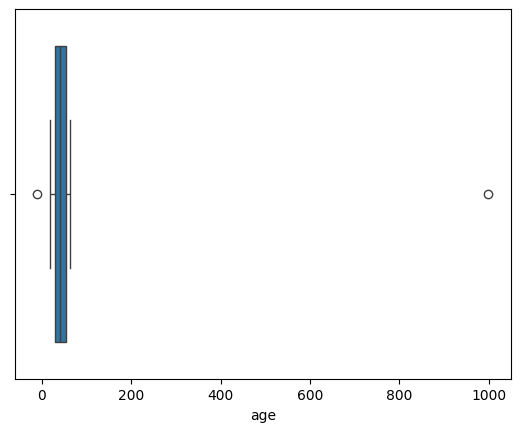

In [ ]:
sns.boxplot(x=df['age'])

На боксплоте мы видим подтверждение расчета базовых статистик, что есть выбросы 999 и -10.

Отфильтруем строки с некорректными значениями:

In [ ]:
df.loc[(df['age'] == -10) | (df['age'] == 999)]


,first_name,last_name,age,email,salary,join_date
519,Hannah,Lee,-10,felix@example.com,"100,212.00",2022-10-03
615,Maya,Hall,999,isaac@example.com,"77,908.00",2023-08-24


В датасете всего две таких строки, их можно удалить, чтобы они не мешали дальнейшему анализу.

In [ ]:
df = df.loc[df['age'] != -10]
df = df.loc[df['age'] != 999]

In [ ]:
df['age'].describe()

,age
count,975.00
mean,41.00
std,13.67
min,18.00
25%,29.00
50%,41.00
75%,53.00
max,64.00


<Axes: xlabel='age'>

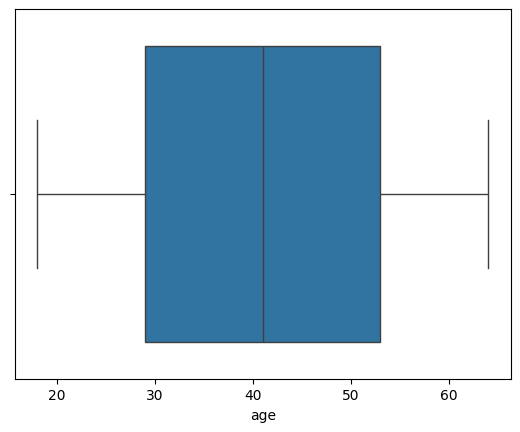

In [ ]:
sns.boxplot(x=df['age'])

После удаления строк с некорректными значениями минимальный возраст теперь 18 лет, максимальный 64, средний 41. Также на боксплоте видно, что данные теперь имеют нормальное распределение.

Проанализируем колонку salary на выбросы:

In [ ]:
df['salary'].describe()

,salary
count,963.00
mean,"230,375.03"
std,"1,229,842.86"
min,"-82,085.00"
25%,"52,652.00"
50%,"75,587.00"
75%,"100,673.50"
max,"9,999,999.00"


<Axes: xlabel='salary'>

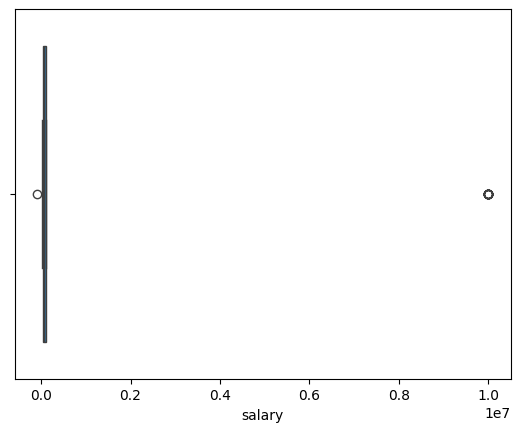

In [ ]:
sns.boxplot(x=df['salary'])

In [ ]:
df.loc[(df['salary'] == -82085) | (df['salary'] == 9999999)]

,first_name,last_name,age,email,salary,join_date
83,Tara,Jackson,29,xander@example.com,"9,999,999.00",2021-09-27
120,Bob,Wilson,45,tina@example.com,"9,999,999.00",2022-06-20
122,Aaron,Harris,59,kira@example.com,"9,999,999.00",2020-09-11
214,Noah,King,50,quinn@example.com,"9,999,999.00",2020-02-10
254,Rachel,Robinson,42,jack@example.com,"9,999,999.00",2023-08-26
290,Bob,Flores,34,grace@example.com,"9,999,999.00",2022-11-07
355,Walter,Mitchell,50,yasmine@example.com,"9,999,999.00",2020-02-10
363,Ulysses,Rivera,47,henry@example.com,"-82,085.00",2020-11-24
392,Kira,Harris,23,charlie@example.com,"9,999,999.00",2020-02-28
399,Ulysses,Moore,32,invalid_email,"9,999,999.00",2023-11-13


В столбце salary есть аномальные значения - 82 085, и 9 999 999. Скорей всего отрицательное значение - это ошибка в данных, а зарплату 9 999 999 имеют 15 человек, нужно больше информации, чтобы понять является ли значение ошибкой, или это реальная зарплата. В нашем случае для получения датасета с качетсвенными данными, удалим эти выбросы.

In [ ]:
df = df.loc[df['salary'] != -82085]
df = df.loc[df['salary'] != 9999999]

In [ ]:
df['salary'].describe()

,salary
count,947.00
mean,"75,959.08"
std,"26,741.50"
min,"30,000.00"
25%,"52,362.00"
50%,"74,014.00"
75%,"99,624.00"
max,"119,998.00"


<Axes: xlabel='salary'>

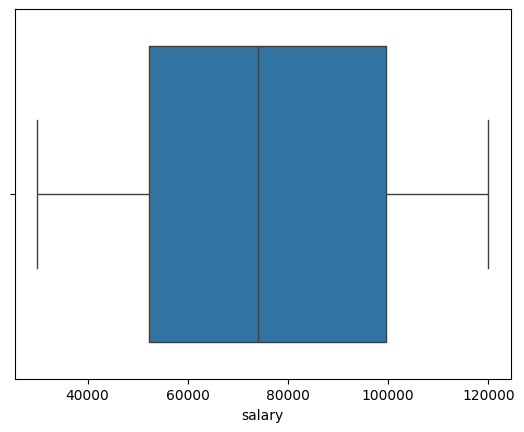

In [ ]:
sns.boxplot(x=df['salary'])

После удаления выбросов мин.зарплата 30 000, макс. - 119 998, а средняя - 75 959,08. Отсюда можно предположить, что значение 9 999 999 было ошибкой ввода данных.

Далее определим все ли email имеют верный формат c помощью регулярных выражений:

In [ ]:
regex_pattern_email = r'(^\S+@\S+\.\S+$)'
df['email1'] = df['email'].str.contains(regex_pattern_email)

<ipython-input-149-78926ae871fb>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['email1'] = df['email'].str.contains(regex_pattern_email)


In [ ]:
df.loc[(df['email1'] == False)].groupby('email').value_counts()

email            first_name  last_name  age  salary      join_date   email1
charlie@example  Liam        Harris     61   67,156.00   2023-11-20  False     1
invalid_email    Alice       Wilson     57   43,600.00   2021-03-07  False     1
                 Beatrice    King       44   118,109.00  2020-12-15  False     1
                 Bob         Wilson     54   32,467.00   2022-10-27  False     1
                 Charlie     Thompson   50   109,257.00  2023-05-05  False     1
                 Daniel      Brown      20   70,069.00   2020-02-06  False     1
                             Smith      22   106,997.00  2022-01-13  False     1
                 David       Garcia     19   119,181.00  2023-12-17  False     1
                 Eve         Campbell   60   73,155.00   2020-07-22  False     1
                 Gina        Jones      62   30,000.00   2023-09-13  False     1
                 Grace       Clark      36   43,412.00   2023-01-10  False     1
                 Hannah      Scott      47   110,936.00  2023-05-05  False     1
                 Isaac       Allen      34   38,217.00   2020-11-10  False     1
                             Moore      39   106,729.00  2022-05-13  False     1
                 Ivy         Brown      22   39,686.00   2023-08-11  False     1
                 Jack        Young      26   84,383.00   2022-01-13  False     1
                 Kevin       Flores     20   68,996.00   2023-06-13  False     1
                             Hill       55   38,752.00   2023-04-28  False     1
                             Lewis      18   52,692.00   2023-07-12  False     1
                 Kira        Wright     48   31,918.00   2023-05-18  False     1
                 Leo         Mitchell   34   60,885.00   2023-03-25  False     1
                 Maya        Davis      25   84,908.00   2023-11-27  False     1
                 Mia         Flores     36   64,483.00   2023-02-07  False     1
                             Nelson     54   100,643.00  2022-05-30  False     1
                             Thomas     27   115,830.00  2023-12-31  False     1
                             Walker     30   54,260.00   2022-04-16  False     1
                 Nate        Jones      55   79,558.00   2020-02-27  False     1
                             White      34   100,195.00  2022-01-13  False     1
                 Noah        Scott      21   117,293.00  2020-03-04  False     1
                                        64   111,438.00  2023-04-29  False     1
                 Paul        Flores     25   108,331.00  2021-07-20  False     1
                             Hall       59   75,587.00   2021-03-15  False     1
                             Nguyen     43   69,266.00   2021-08-29  False     1
                 Piper       Adams      64   76,828.00   2022-04-07  False     1
                 Quincy      King       48   36,738.00   2022-12-10  False     1
                 Quinn       Allen      24   49,154.00   2021-11-23  False     1
                             Anderson   44   32,383.00   2021-04-17  False     1
                             Flores     62   67,275.00   2022-06-03  False     1
                 Rosa        Hill       19   64,427.00   2021-08-30  False     1
                 Samuel      Torres     50   30,872.00   2023-06-18  False     1
                 Steve       Lee        30   68,515.00   2023-07-11  False     1
                 Tara        Allen      34   57,758.00   2020-10-27  False     1
                 Ulysses     Flores     43   44,548.00   2022-09-06  False     1
                 Uma         Torres     30   119,020.00  2023-06-25  False     1
                 Vera        Jackson    21   102,614.00  2023-02-08  False     1
                 Victor      Harris     29   49,867.00   2022-03-12  False     1
                             Rivera     58   107,524.00  2020-06-27  False     1
                 Xena        Wright     48   31,190.00   2023-01-21  False     1
                 Yasmine     Thomas 

В датасете найдено 3 email некорректного формата:

- invalid_email
- charlie@example
- kevin


Адреса charlie@example и kevin можно заменить на charlie@example.com и kevin@example.com.

invalid_email - удалим эти значения, т.к. возможно емэйл может понадобится для анализа рассылоке

In [ ]:
df['email'].replace('charlie@example', 'charlie@example.com', inplace=True)
df['email'].replace('kevin', 'kevin@example.com', inplace=True)
df = df.loc[df['email'] != 'invalid_email']

In [ ]:
df.loc[(df['email1'] == False)].groupby('email').value_counts() #проверим изменились ли email

,,,,,,,count
email,first_name,last_name,age,salary,join_date,email1,
charlie@example.com,Liam,Harris,61,"67,156.00",2023-11-20,False,1
kevin@example.com,David,Mitchell,23,"112,600.00",2023-08-05,False,1


Далее проверим все ли даты указаны верно, нет ли дат, которые позже текущей и раньше '2000-01-01'.  

In [ ]:
def correct_date(j_date):
    current_time = dt.datetime.now()
    prev_date = dt.datetime.strptime('2000-01-01', "%Y-%m-%d")
    if j_date > current_time:
        return False
    if j_date < prev_date:
        return False
    else:
        return True

df['join_date1'] = df['join_date'].apply(correct_date)
prev_date = dt.datetime.strptime('2000-01-01', "%Y-%m-%d")

In [ ]:
df.loc[(df['join_date1'] == False)]

,first_name,last_name,age,email,salary,join_date,email1,join_date1
296,Henry,Johnson,38,uma@example.com,"36,070.00",2026-05-12,True,False
321,Olivia,Anderson,37,rachel@example.com,"95,423.00",1920-01-22,True,False


Найдено всего два значения с некорректной датой, удалим эти строки:

In [ ]:
df = df.loc[(df['join_date'] != '2026-05-12') & (df['join_date'] != '1920-01-22') ]

Вызовем функцию еще раз для проверки удалены ли значения:

In [ ]:
df['join_date1'] = df['join_date'].apply(correct_date)

In [ ]:
df.loc[(df['join_date1'] == False)]

,first_name,last_name,age,email,salary,join_date,email1,join_date1


Некорректные значения даты удалены. Удалим ненужные столбцы join_date1 и email1.


In [ ]:
df.drop(['email1'], axis= 1 , inplace= True )
df.drop(['join_date1'], axis= 1 , inplace= True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  909 non-null    object        
 1   last_name   909 non-null    object        
 2   age         909 non-null    Int64         
 3   email       908 non-null    object        
 4   salary      897 non-null    float64       
 5   join_date   909 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 50.6+ KB


Удалим дублирующие строки:

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  909 non-null    object        
 1   last_name   909 non-null    object        
 2   age         909 non-null    Int64         
 3   email       908 non-null    object        
 4   salary      897 non-null    float64       
 5   join_date   909 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 50.6+ KB


In [ ]:
df.isnull().sum()

,0
first_name,0
last_name,0
age,0
email,1
salary,12
join_date,0


В датасете остались пропущенные значения в колонках:
- email 1 пропуск
- salary - 12 пропусков

Удалим пропуск в email.

В salary заменим пропущенные значения медианным значением.

In [ ]:
df = df.dropna(subset =['email'])
df.isnull().sum()

,0
first_name,0
last_name,0
age,0
email,0
salary,12
join_date,0


In [ ]:
df['salary'].describe()

,salary
count,896.00
mean,"76,144.83"
std,"26,528.39"
min,"30,019.00"
25%,"52,733.50"
50%,"75,461.00"
75%,"99,203.25"
max,"119,998.00"


In [ ]:
print(df['salary'].median())
print(df['salary'].mode())

75461.0
0     36,040.00
1     39,980.00
2     40,039.00
3     47,184.00
4     48,294.00
5     49,932.00
6     51,510.00
7     51,757.00
8     59,462.00
9     62,750.00
10    65,663.00
11    71,621.00
12    77,025.00
13    80,677.00
14    85,874.00
15    87,931.00
16    94,855.00
17    98,192.00
18    99,007.00
19    99,234.00
20   107,256.00
21   108,277.00
22   108,700.00
23   108,738.00
24   111,432.00
25   113,299.00
Name: salary, dtype: float64


Медианная и средняя зарплата несильно отличаются. В тоже время имеется много модальных значений.
Посмотрим на распределение зарплаты на графике:

<ipython-input-169-5a5bf00f89af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df['salary'])


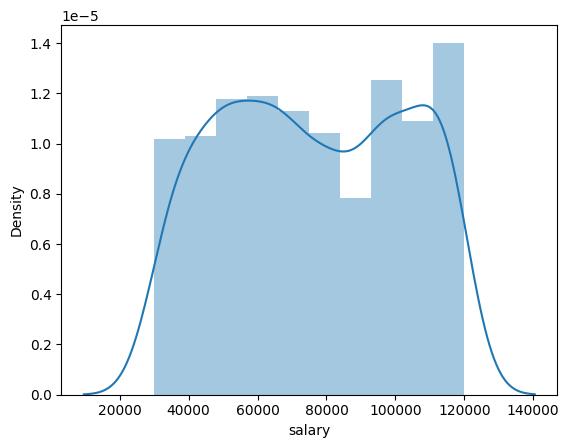

In [ ]:
sns_plot = sns.distplot(df['salary'])
fig = sns_plot.get_figure()

Как видно на графике минимальная зарплата около 30 000, максимальная - 120 000, и видно, что распределение мультимодально.

Заменим пропущенные значения медианным значением:

In [ ]:
df['salary'].fillna(df['salary'].median(), inplace=True)

<ipython-input-170-dc843e7c6480>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(df['salary'].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   first_name  908 non-null    object        
 1   last_name   908 non-null    object        
 2   age         908 non-null    Int64         
 3   email       908 non-null    object        
 4   salary      908 non-null    float64       
 5   join_date   908 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), object(3)
memory usage: 50.5+ KB


Теперь датасет, с моей точки зрения, является качественным. Мы избавились от аномальных данных, некорректно введенных, дубликатов и пропущенных значений.

